In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from tqdm import tqdm


datasetsFilePath = "datasets/"
savesFilePath = "saves/"

## 한국어 감정 정보가 포함된 단발성 대화 데이터셋
**파일** : ['single_train.xlsx'](https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=120&topMenu=100&aihubDataSe=extrldata&dataSetSn=270)

In [2]:
single_df = pd.read_excel(f'{datasetsFilePath}single_train.xlsx')
single_df.head()

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,5898.0
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,5665.0
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,5267.0
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,4830.0
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,6037.0


In [3]:
single_df = single_df.iloc[:,:2]
single_df.head()
single_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  38594 non-null  object
 1   Emotion   38594 non-null  object
dtypes: object(2)
memory usage: 603.2+ KB


In [4]:
single_df.rename(columns={'Sentence':'발화','Emotion':'감정'},inplace=True)
single_df["감정"].unique()

array(['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오'], dtype=object)

In [5]:
single_df=single_df[single_df["감정"] != '놀람']
single_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32696 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발화      32696 non-null  object
 1   감정      32696 non-null  object
dtypes: object(2)
memory usage: 766.3+ KB


In [6]:
single_df['감정']=np.where(single_df['감정'].str.match('공포'),"불안",single_df['감정'])
single_df.info()
single_df['감정'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 32696 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발화      32696 non-null  object
 1   감정      32696 non-null  object
dtypes: object(2)
memory usage: 766.3+ KB


감정
행복    6037
분노    5665
불안    5468
혐오    5429
슬픔    5267
중립    4830
Name: count, dtype: int64

## 감성대화 말뭉치
파일 : ['corpus_train_1.xlsx','corpus_train_2.xlsx'](https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=86)

ori_1_df = pd.read_excel(f'{datasetsFilePath}corpus_train_1.xlsx',index_col=0)
ori_2_df = pd.read_excel(f'{datasetsFilePath}corpus_train_2.xlsx',index_col=0)
display(ori_1_df.head(3))
display(ori_2_df.head(3))

ori_1_df = ori_1_df.fillna("")
ori_2_df = ori_2_df.fillna("")

ori_1_df["사람문장"] = ori_1_df["사람문장1"].astype(str) + ori_1_df["사람문장2"].astype(str) + ori_1_df["사람문장3"].astype(str)
ori_2_df["사람문장"] = ori_2_df["사람문장1"].astype(str) + ori_2_df["사람문장2"].astype(str) + ori_2_df["사람문장3"].astype(str)
corpus_df = pd.concat([ori_1_df,ori_2_df])
display(corpus_df.head(5))
corpus_df.info()

corpus_df = corpus_df[["사람문장","감정_대분류"]]

corpus_df= corpus_df.rename({"감정_대분류":"감정"},axis=1)

corpus_df["감정"] = corpus_df["감정"].apply(lambda x:x.strip())

corpus_df["감정"].value_counts()

corpus_df["감정"]=np.where(corpus_df["감정"].str.match("상처"),"슬픔",corpus_df["감정"])
corpus_df["감정"]=np.where(corpus_df["감정"].str.match("기쁨"),"행복",corpus_df["감정"])

corpus_df=corpus_df.reset_index(drop=True)

corpus_df.rename({"사람문장":"발화"},axis=1,inplace=True)

display(corpus_df.head(5))
corpus_df.info()

## 한국어 감정 정보 연속적 대화 데이터셋
파일 : ['dialogue_train.xlsx'](https://aihub.or.kr/aihubdata/data/view.do?dataSetSn=271)

In [7]:
dialogue_df = pd.read_excel(f'{datasetsFilePath}dialogue_train.xlsx')
dialogue_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,행복,중립,슬픔,공포,혐오,분노,놀람
0,dialog #,발화,감정,NaN,NaN,1030.0,NaN,NaN,NaN,NaN,NaN,NaN
1,S,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,손님 왔어요.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,손님? 누구?,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
columns = dialogue_df.iloc[0]
dialogue_df = dialogue_df.rename(columns=columns).iloc[:,1:3]
dialogue_df.drop(index=0,axis=0,inplace=True)
dialogue_df.head()

,발화,감정
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노
2,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오
3,손님 왔어요.,중립
4,손님? 누구?,중립
5,몰라요. 팀장님 친구래요.,중립


In [9]:
dialogue_df["감정"].value_counts()

감정
중립     43786
놀람      4866
분노      3628
슬픔      1972
행복      1030
혐오       220
공포        98
ㅍ         12
분          4
ㅈ중립        1
중림         1
분ㄴ         1
ㄴ중립        1
줄          1
Name: count, dtype: int64

In [10]:
dialogue_df = dialogue_df[dialogue_df["감정"].isin(["중립","놀람","분노","슬픔","행복","혐오","공포"])]

In [11]:
dialogue_df["감정"]=np.where(dialogue_df["감정"].str.match("놀람"),"당황",dialogue_df["감정"])
dialogue_df["감정"]=np.where(dialogue_df["감정"].str.match("공포"),"불안",dialogue_df["감정"])

## 전처리한 데이터셋 합치기

In [13]:
final_df = pd.concat([single_df,dialogue_df])
final_df['감정'].value_counts()

감정
중립    48616
분노     9293
슬픔     7239
행복     7067
혐오     5649
불안     5566
당황     4866
Name: count, dtype: int64

In [14]:
final_df.reset_index(drop=True,inplace=True)
display(final_df)

,발화,감정
0,언니 동생으로 부르는게 맞는 일인가요..??,불안
1,그냥 내 느낌일뿐겠지?,불안
2,아직너무초기라서 그런거죠?,불안
3,유치원버스 사고 낫다던데,불안
4,근데 원래이런거맞나요,불안
...,...,...
88291,얘긴 다 끝났냐? 원예부,중립
88292,"예. 그거 때문에, 부탁이 있......는......데요.",중립
88293,여자 숨겨달라는거면 사절이다.,중립
88294,아무래도 안되나요?,중립


In [15]:
str_lens = []
for i in tqdm(range(len(final_df))):
    text = final_df.iloc[i,0]
    str_len = len(text)
    str_lens.append(str_len)
final_df["str_len"] = str_lens

100%|█████████████████████████████████████████████████████████████████████████| 88296/88296 [00:01<00:00, 46759.82it/s]


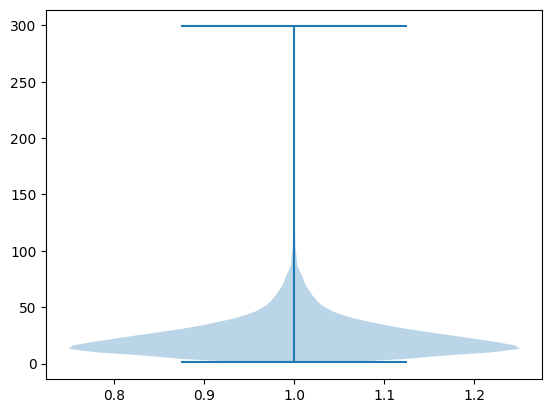

In [16]:
from matplotlib import pyplot as plt
plt.violinplot(final_df["str_len"])
plt.show()

In [17]:
final_df = final_df[final_df["str_len"] <= 128]

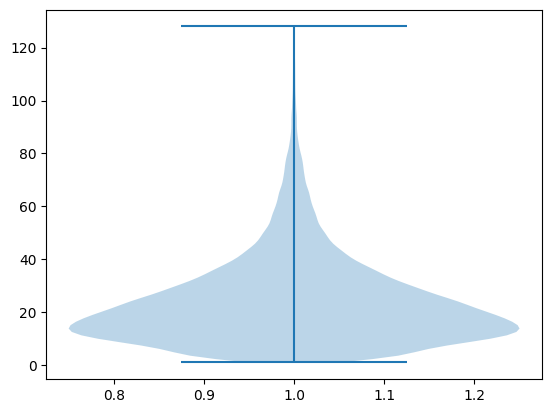

In [18]:
plt.violinplot(final_df["str_len"])
plt.show()

In [19]:
final_df.to_csv(f'{datasetsFilePath}sentiment_data.csv',encoding="UTF8")